### author : phyblas
### [phyblas](https://phyblas.hinaboshi.com/20161212)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Issues : Pet Monster which damage depends on amount of fruits & vegetable we feed

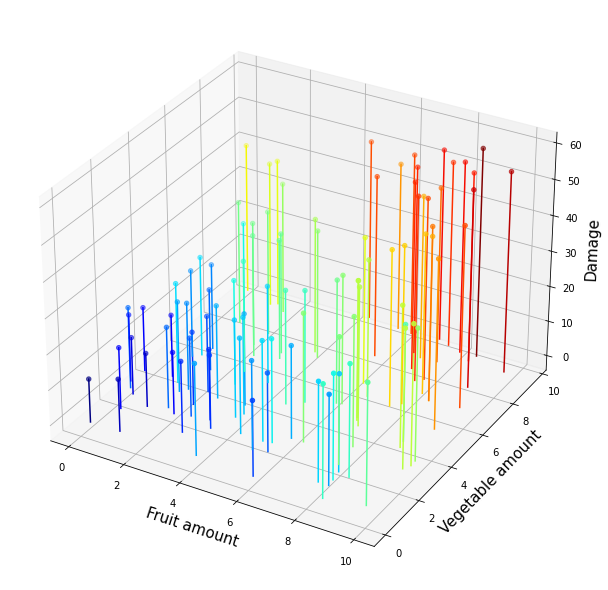

In [22]:
from mpl_toolkits.mplot3d import Axes3D

n = 100
fruit_amt = np.random.uniform(0, 10, n)
veget_amt = np.random.uniform(0, 10, n)
noise = np.random.randn(n) * 3
damage = 10 + fruit_amt*2 + veget_amt*3 + noise

plt.figure(figsize=(8,8))
ax = plt.axes([0,0,1,1], projection='3d')
kw = dict(fontsize=15)
ax.set_xlabel('Fruit amount', **kw)
ax.set_ylabel('Vegetable amount', **kw)
ax.set_zlabel('Damage', **kw)


def color_by_damage(x):
    x = (x - damage.min()) / (damage.max() - damage.min())
    return plt.get_cmap('jet')(x)
# make stems
for i in range(n):
    ax.plot([fruit_amt[i], fruit_amt[i]],
            [veget_amt[i], veget_amt[i]],
            [0, damage[i]], # param want [z_min, z_max]
           color=color_by_damage(damage[i])) # map color of stem
    
# map colors of tip dots
ax.scatter3D(fruit_amt, veget_amt, damage, c=color_by_damage(damage))  

plt.show()